In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [3]:
#read the dataset 
movie_data=pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')

In [4]:
# info about the data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [19]:
# see sample of data
movie_data.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444


In [21]:
# Delete attributs that don't make sense 
movie_data.drop(['Poster_Link','Overview'],axis=1,inplace=True)

In [23]:
#movie_data.head(3)

In [8]:
# find the missing values here i found missing values in [certificate , meta_score,gross]
movie_data.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
# here i have non-numerical attribut
movie_data['Certificate'].value_counts()
# here i looking for most frequently used for filling the missing values 
# here i found that U most used so i used it to fill the missing values 

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [25]:
#fill the empty cells with 'U'
movie_data['Certificate'].fillna('U',inplace=True)

In [27]:
# here i have numerical attribut, so i use mean value to fill missing values 
movie_data['Meta_score'].fillna(movie_data['Meta_score'].mean(),inplace=True)

In [98]:
['Gross'] = movie_data['Gross'].str.replace(',','')
# to remove','to be able to convert it to float to calculate the mean 

In [28]:
movie_data['Gross'] = movie_data['Gross'].astype(float)
movie_data['Gross'] = movie_data['Gross'].fillna(movie_data['Gross'].mean())

In [15]:
movie_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,68034750
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,68034750
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
998,Lifeboat,1944,U,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,68034750


In [38]:
# here i will create dataframe for genre 
dd=movie_data['Genre'].value_counts().reset_index()
dd.columns = ['Genre','number_of_movies']
#here i found that Drama is the  popular genre
dd

,Genre,number_of_movies
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Adventure, Thriller",1
198,"Animation, Action, Sci-Fi",1
199,"Action, Crime, Comedy",1
200,"Animation, Crime, Mystery",1


In [40]:
import matplotlib.pyplot as plt

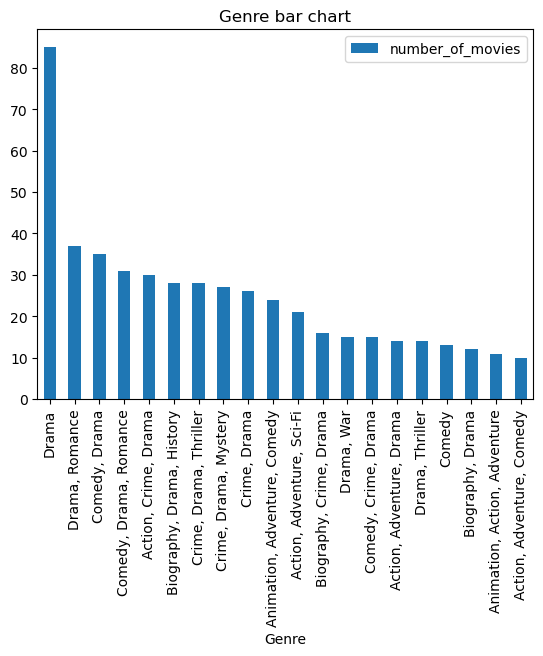

In [46]:
# here i draw the top twenty values,because the representation of all values was not clear 
df=dd.head(20)
df.plot(x='Genre', kind='bar',title='Genre bar chart')
plt.show()

In [100]:
# here i find the director with the top_rated movie
movie_data.sort_values('IMDB_Rating',ascending=False)
movie_data.head(1)['Director']

0    Frank Darabont
Name: Director, dtype: object

In [104]:
#here i find the number of movies that directed by each director
dd_1=movie_data['Director'].value_counts().reset_index()
dd_1.columns = ['Director','number_of_movies']
dd_1

,Director,number_of_movies
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
...,...,...
543,Neill Blomkamp,1
544,Tomas Alfredson,1
545,Duncan Jones,1
546,Jacques Audiard,1


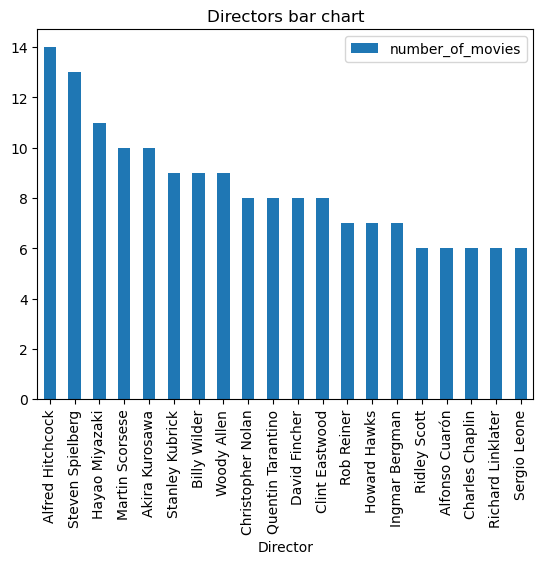

In [97]:
df=dd_1.head(20)
df.plot(x='Director', kind='bar',title='Directors bar chart')
plt.show()

to analyze this dataset i start with understanding it and take information about it.after that i start to clean and prepare this data. so i start with looking for missing values and handling it.At this stage i deal with non_numerical and numerical.for the first one i use most frequent values the second one i use mean of the column to fill the empty cells.after that i start analyze stage using pandas and matplotlib libraries.using different functions i was able to find out some information such as the most viewed genre, the director of the top_reated movie and the director who directed more movies.when i visualize the data using a bar chart i face problem with the larg number of values so i use just the first 20 values.    